In [1]:
# Import needed modules

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
import glob

In [2]:
# To move onto 'smoothing' portion of data analysis, import needed modules

from shapely.geometry import LineString                    

In [3]:
# Load data for one day, Feb 4 2008, for Cab No. 2.  This initially has approximately 290 rows of data.
# File is called Amended2.csv and can be found at:
#     https://drive.google.com/open?id=0B7HB0g6q7bfuQ2NOSWhnaTVxemc

# OriginalDF = pd.read_csv('/Local_Path/Amended2.csv', names=['lat', 'long'])

In [4]:
OriginalDF.head()

,lat,long
0,39.88105,116.45865
1,39.87486,116.45245
2,39.88288,116.45003
3,39.87931,116.44463
4,39.87491,116.44972


In [5]:
OriginalDF.shape

(293, 2)

In [6]:
# Change to array to implement into shapely

coordinates = OriginalDF.as_matrix(columns=['lat', 'long'])

In [7]:
# Shapely uses linear splines, and curves are also approximated with linear splines
# More info on 'shapely' can be found at toblerity.org/shapely/manual

# Create a shapely line from the original coordinate data
line = LineString(coordinates)

# Shapely manual recommends setting of .015 for tolerance
tolerance = 0.015

In [8]:
# If we set "preserve topology" to False, we ensure Douglas-Peucker algorithm is used (speedy!)

simplified_line = line.simplify(tolerance, preserve_topology=False)

print(line.length, "line length")
print(simplified_line.length, "simplified line length")
print(len(line.coords), "coordinate pairs in full data set")
print(len(simplified_line.coords), "coordinate pairs in simplified data set")
print(round(((1 - float(len(simplified_line.coords)) / float(len(line.coords))) * 100), 1), "percent compressed")

2.2857451114548355 line length
1.7266979872888255 simplified line length
293 coordinate pairs in full data set
30 coordinate pairs in simplified data set
89.8 percent compressed


In [9]:
# Put the simplified set of coordinates into a new dataframe called simpleDF

long = pd.Series(pd.Series(simplified_line.coords.xy)[1])
lat = pd.Series(pd.Series(simplified_line.coords.xy)[0])
simpleDF = pd.DataFrame({'long':long, 'lat':lat})
simpleDF.tail()

,lat,long
25,39.90773,116.41163
26,39.88828,116.38158
27,39.88929,116.43824
28,39.86591,116.45433
29,39.88076,116.45872


In [10]:
simpleDF.head()

,lat,long
0,39.88105,116.45865
1,39.90629,116.45544
2,39.86984,116.41131
3,39.86654,116.34923
4,39.89565,116.41282


In [11]:
# Check for any NAN
SmoothedDF = simpleDF.dropna()

# Check end of new dataframe
SmoothedDF.tail()

,lat,long
25,39.90773,116.41163
26,39.88828,116.38158
27,39.88929,116.43824
28,39.86591,116.45433
29,39.88076,116.45872


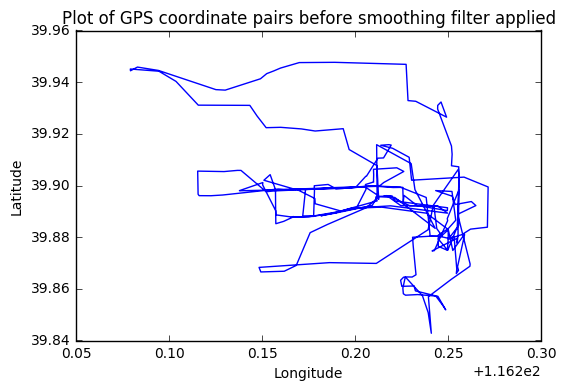

In [12]:
# This is one day's worth of travel from Cab No. 2 on Feb 4, 2008.  Cab was active that day from approximately 8am to 11pm.

plt.plot(OriginalDF.long, OriginalDF.lat)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Plot of GPS coordinate pairs before smoothing filter applied")
plt.show()

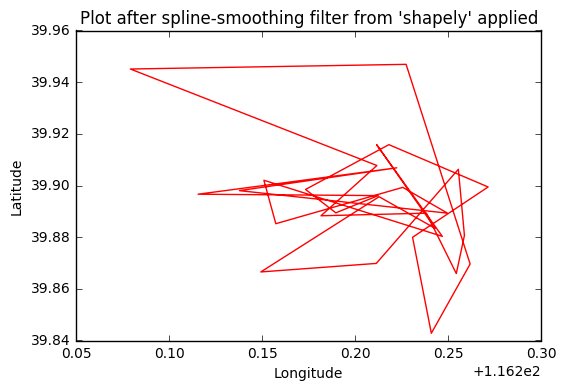

In [13]:
# After smoothing, here's plot of day's worth of travel in Cab No. 2 on Feb 4 2008

plt.plot(SmoothedDF.long, SmoothedDF.lat, c='r')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Plot after spline-smoothing filter from 'shapely' applied")
plt.show()

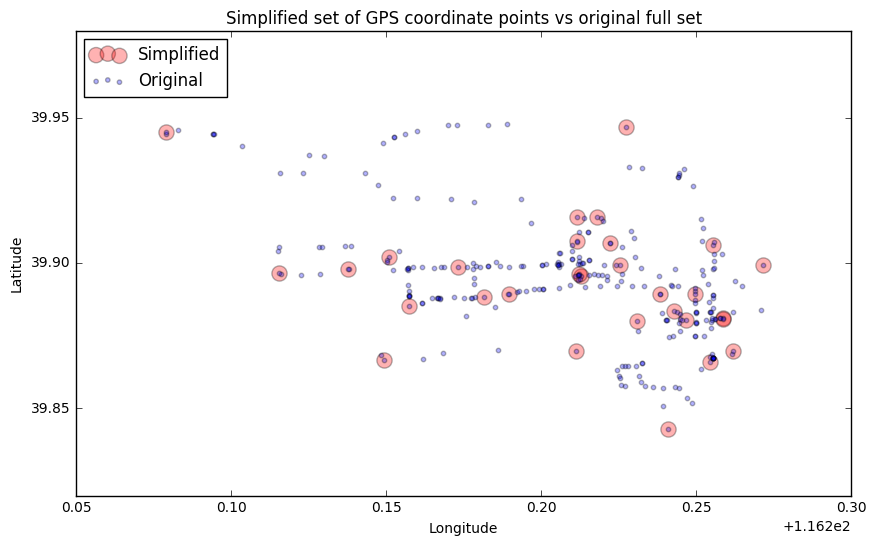

In [14]:
# Out of curiousity, let's see what original data points look like compared to 'spline' simplified set of coordinate points

plt.figure(figsize=(10, 6), dpi=120)
SmoothedDF_scatter = plt.scatter(SmoothedDF['long'], SmoothedDF['lat'], c='r', alpha=0.3, s=120)
OriginalDF_scatter = plt.scatter(OriginalDF['long'], OriginalDF['lat'], c='b', alpha=0.3, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simplified set of GPS coordinate points vs original full set')
plt.legend((SmoothedDF_scatter, OriginalDF_scatter), ('Simplified', 'Original'), loc='upper left')
plt.show()